# Regression

In [54]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats
import savingfigR as sf
from statsmodels.formula.api import ols
import pandas as pd
import plotly.express as px 

## Calculate B's

In [55]:
weight = np.array([55,61,67,83,65,82,70,58,65,61])
height = np.array([140,150,152,220,190,195,175,130,155,160])
B1 = np.sum((weight - np.mean(weight)) * (height - np.mean(height))) / np.sum((weight - np.mean(weight))**2)
B0 = np.mean(height) - B1 * np.mean(weight)

In [56]:
print(B0)

-7.176929857700571


In [57]:
print(B1)

2.6068505226042062


## Bivariate prediction

In [58]:
weight_bob = 80
height_bob = B0 + B1 * weight_bob
height_bob

201.37111195063594

## Bivariate - Standard Error of Estimate

In [59]:
SE = np.sqrt(np.sum((height - (B0 + B1 * weight))**2) / (len(weight) - 2))
print(SE)

14.114083096135902


## Correlation Coefficient (r)

In [60]:
r = np.sum((weight - np.mean(weight)) * (height - np.mean(height))) / (np.sqrt(sum((weight - np.mean(weight))**2)) * np.sqrt(np.sum((height - np.mean(height))**2)))
print(r)

0.8786421493179031


In [61]:
stats.pearsonr(height, weight)[0]

0.8786421493179033

## Coefficient of Determination (r)

In [62]:
rsquared = stats.pearsonr(weight,height)[0]**2
print(rsquared)

0.7720120265579846


## Bivariate Regression - Significance Test Cont'd

In [63]:
N = len(weight)
Fstat0 = (r*r*(N-2)) / (1-(r*r))
# Area under F-Distribution, using pf() function
pval0 = 1 - stats.f.cdf(Fstat0, 1, N-2) # Fstat, parameters (k - 1), df (N - k)

In [64]:
print(Fstat0)

27.089570205046993


In [65]:
print(pval0)

0.0008176334841379918


## Bivariate Regression Python

In [66]:
df = pd.DataFrame(data=np.reshape([height, weight], (10,2)), columns=['Height', 'Weight'])
m1 = ols('weight ~ height', data=df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     27.09
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           0.000818
Time:                        14:28:32   Log-Likelihood:                -28.670
No. Observations:                  10   AIC:                             61.34
Df Residuals:                       8   BIC:                             61.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.3322      9.604      1.805      0.1

/Users/duncan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



In [67]:
m1.params

Intercept    17.332227
height        0.296147
dtype: float64

In [68]:
m1.f_pvalue

0.0008176334841379375

In [69]:
m1.rsquared

0.7720120265579844

## Regression - Nonlinear

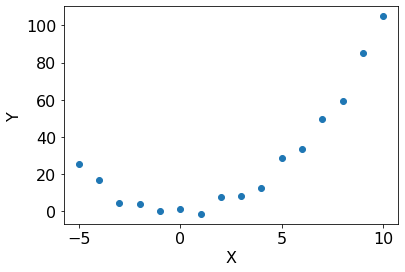

In [70]:
X = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])
Y = X**2 + np.random.normal(0, 3, 16)
df = pd.DataFrame(data=np.reshape([X, Y], (len(X),2)), columns=['X', 'Y'])
fig = plt.figure()
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

sf.best_save(fig, 'nonlinear')

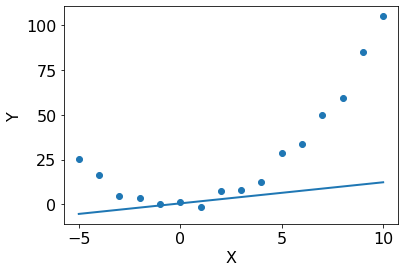

In [71]:
m2 = ols('Y ~ X', data=df).fit()
ymxb = lambda m, x, b: m*x + b

fig = plt.figure()
plt.scatter(X,Y)
x = np.linspace(np.min(X), np.max(X), 500)
plt.plot(x, ymxb(m2.params[1], x, m2.params[0]), lw=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

sf.best_save(fig, 'nonline_wline')

In [72]:
Xsqaured = X**2
df = pd.DataFrame(data=np.reshape([Xsqaured, Y], (len(Xsqaured),2)), columns=['Xsquared', 'Y'])
m0 = ols('Y ~ Xsquared', data=df).fit()
m0.summary()

/Users/duncan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     372.2
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           1.75e-11
Time:                        14:28:33   Log-Likelihood:                -52.243
No. Observations:                  16   AIC:                             108.5
Df Residuals:                      14   BIC:                             110.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3616      2.312     -0.156      0.878      -5.320       4.597
Xsquared       1.2134      0.063     19.293      0.000       1.078       1.348
==============================================================================
Omnibus:                        5.109   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                2.930
Skew:                          -1.030   Prob(JB):                        0.231
Kurtosis:                       3.393   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

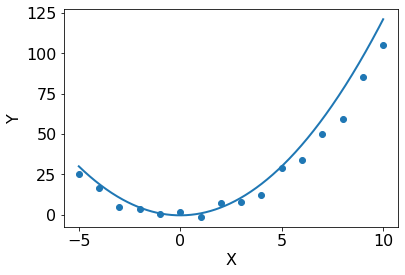

In [73]:
ymxb2 = lambda m, x, b: m*(x**2) + b

fig = plt.figure()
plt.scatter(X,Y)
x = np.linspace(np.min(X), np.max(X), 500)
plt.plot(x, ymxb2(m0.params[1], x, m0.params[0]), lw=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

sf.best_save(fig, 'nonline_wNline')

## Multiple Regression 

In [74]:
# this won't line up because I can't copy all of the data, it gets cut off 
W = np.array([193.6, 137.5, 145.4, 117, 105.4, 99.9, 74, 74.4, 112.8, 125.4, 126.5])
P = np.array([6.24, 8.03, 11.62, 7.68, 10.72, 9.28, 6.23, 8.67, 6.91, 7.51, 10.01])
S = np.array([30.1, 22.2, 25.7, 28.9, 27.3, 33.4, 26.4, 17.2, 15.9, 12.2, 30.])
data0 = np.reshape((W, P, S), (len(W),3))
df = pd.DataFrame(data=np.reshape([W,P,S], (len(W), 3)), columns=['W', 'P', 'S'])

In [75]:
fig = px.scatter_matrix(df)
fig.show()

# sf.best_save(fig, 'matrixscatter')

In [76]:
corr = np.empty((3,3))
for i in range(3):
    for j in range(3):
        corr[i,j] = stats.pearsonr(data0[:,i], data0[:,j])[1]
print(corr)

[[0.00000000e+00 7.24843612e-07 7.40793462e-03]
 [7.24843612e-07 0.00000000e+00 2.00372254e-02]
 [7.40793462e-03 2.00372254e-02 0.00000000e+00]]


## Bivariate Regression in Python

In [77]:
m2 = ols('W ~ S + P', data=df).fit()
m2.summary()

/Users/duncan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     88.58
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           3.48e-06
Time:                        14:28:34   Log-Likelihood:                -43.357
No. Observations:                  11   AIC:                             92.71
Df Residuals:                       8   BIC:                             93.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3350      6.586     -1.265      0.241     -23.523       6.853
S              0.2089      0.126      1.657      0.136      -0.082       0.500
P              1.0775      0.127      8.487      0.000       0.785       1.370
==============================================================================
Omnibus:                        0.072   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.149
Skew:                          -0.111   Prob(JB):                        0.928
Kurtosis:                       2.476   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
m2.params

Intercept   -8.334964
S            0.208939
P            1.077476
dtype: float64

In [79]:
m2.pvalues

Intercept    0.241314
S            0.136016
P            0.000028
dtype: float64

In [80]:
m2.rsquared

0.9567935120954401

## Stepwise - Multiple Regression 

In [81]:
# no easy algorithm found
# do by hand if want 

## Nonparametric - Spearman's

In [82]:
IQ = np.array([86, 97, 99, 100, 101, 103, 106, 110, 112, 113])
TVhours = np.array([2, 20, 28, 27, 50, 29, 7, 17, 6, 12])
dsquared = np.array([0, 16, 25, 9, 25, 9, 16, 9, 49, 36])
N = len(IQ)
rho = 1 - (6 * np.sum(dsquared)) / (N*(N**2-1))
Fstat1 = (rho**2*(N-2)) / (1-(rho**2))
# Area under F-Distribution, using pf() function
pval1 = 1 - stats.f.cdf(Fstat1, 1, N-2) # Fstat, parameters (k - 1), df (N - k)
print(rho)

-0.17575757575757578


In [83]:
print(pval1)

0.6271883447764843


In [84]:
stats.spearmanr(IQ, TVhours)

SpearmanrResult(correlation=-0.17575757575757575, pvalue=0.6271883447764844)